<a href="https://colab.research.google.com/github/OfficialAL/University-Work-2nd-Year/blob/main/AI%26ML_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Section1: Import Liberaries and dataset:**

In [ ]:
# Import essential libraries for data analysis and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# Load the insurance dataset
df = pd.read_csv('insurance.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nBasic statistics:")
print(df.describe())

Dataset shape: (1338, 7)

First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Basic statistics:
  

# **Section2: Exploratory Data Analysis**

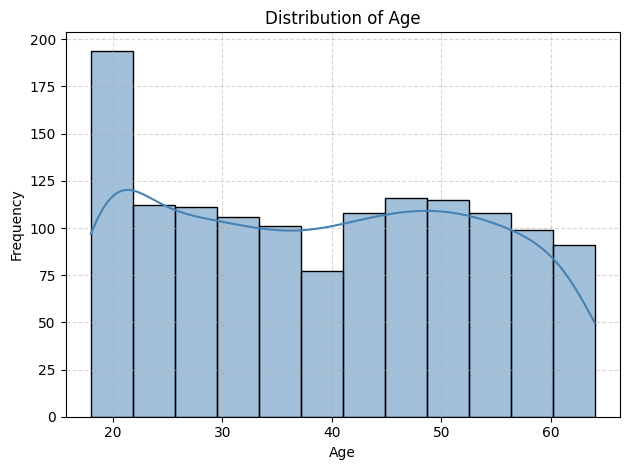

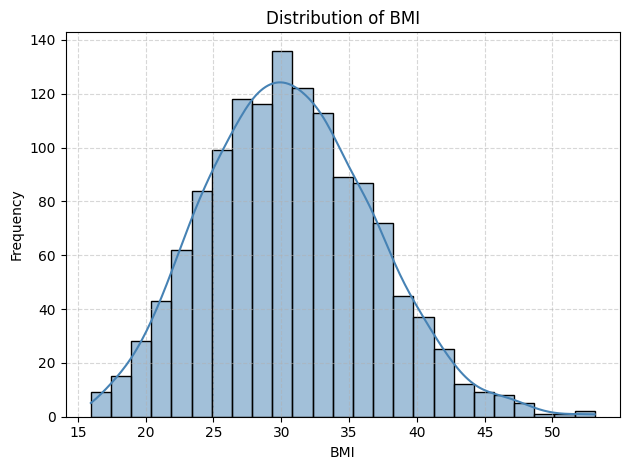

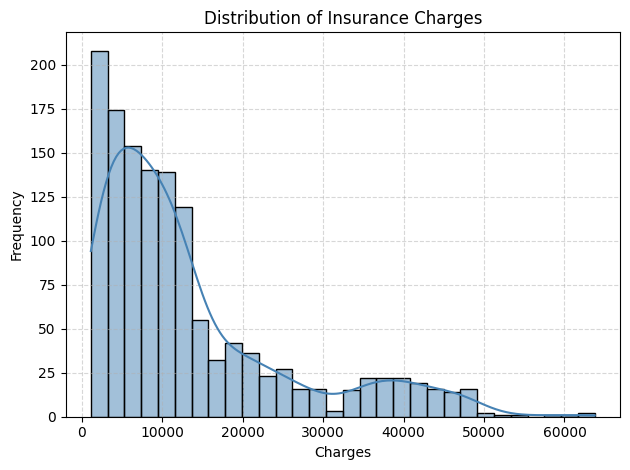

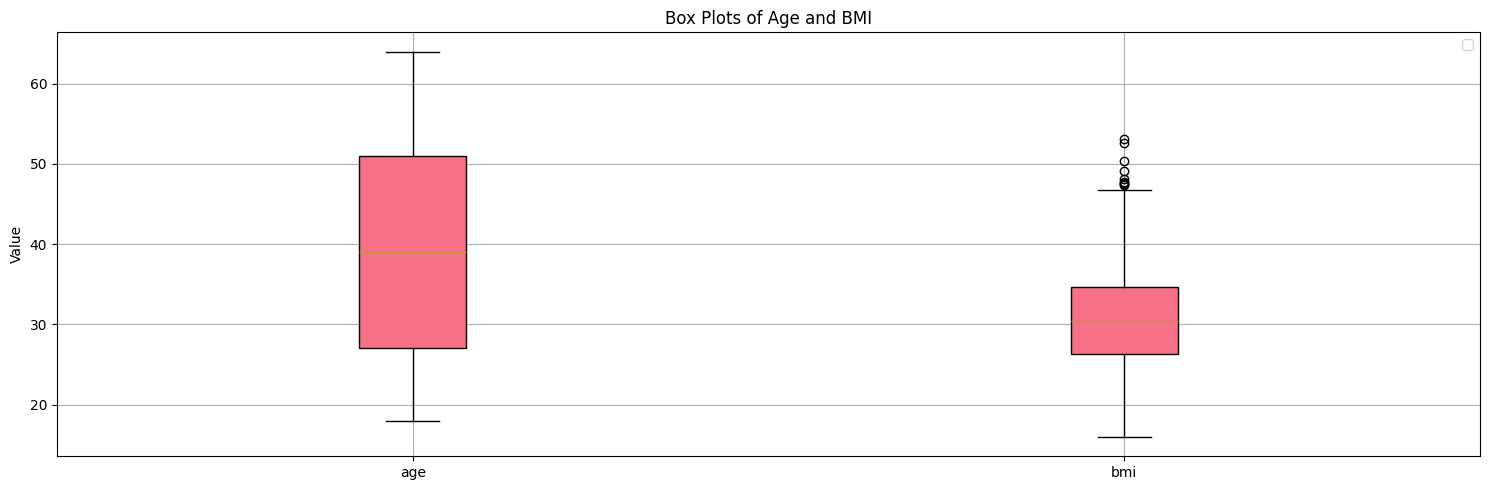

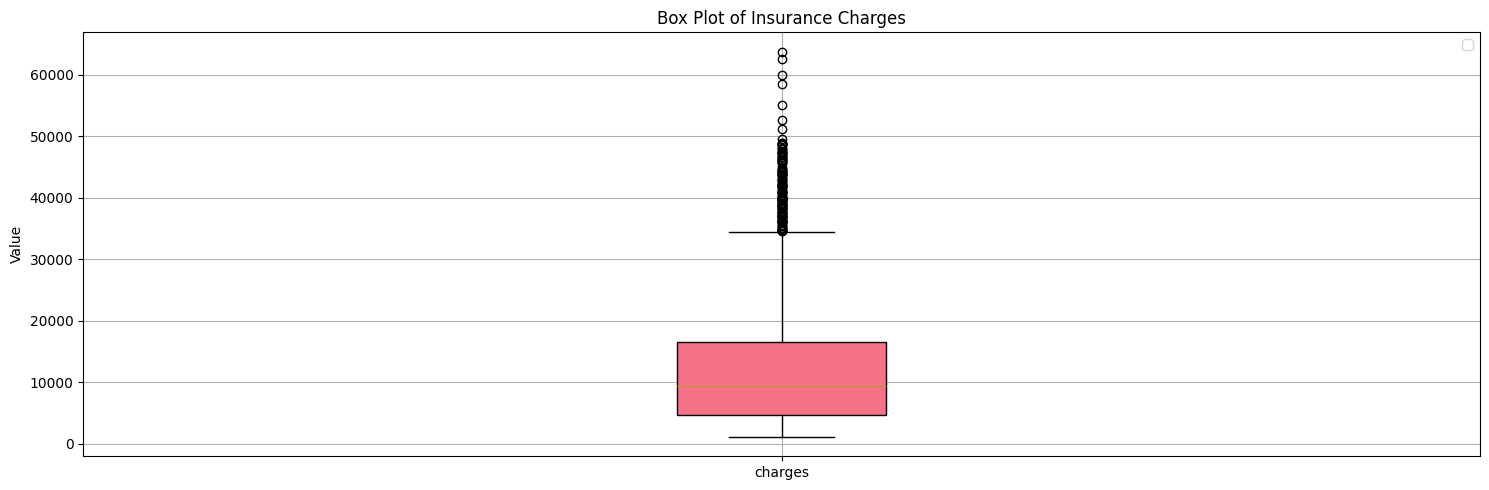

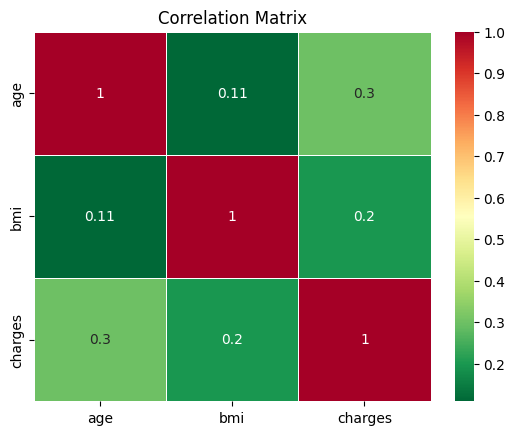

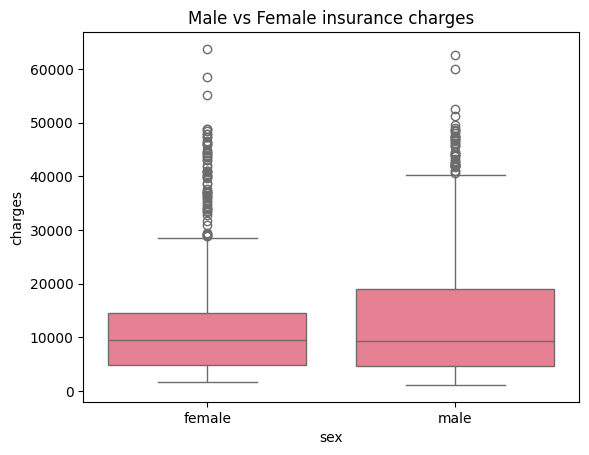

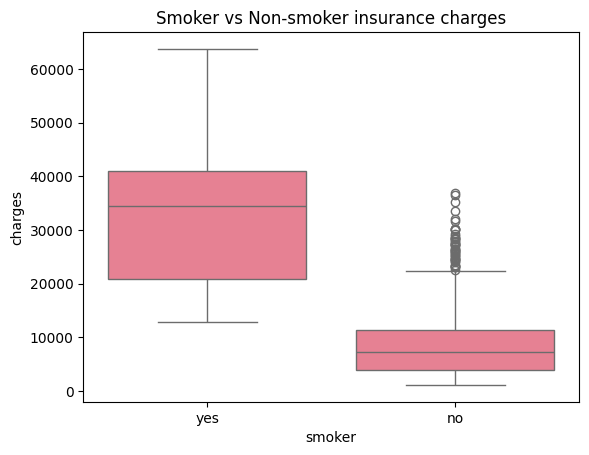

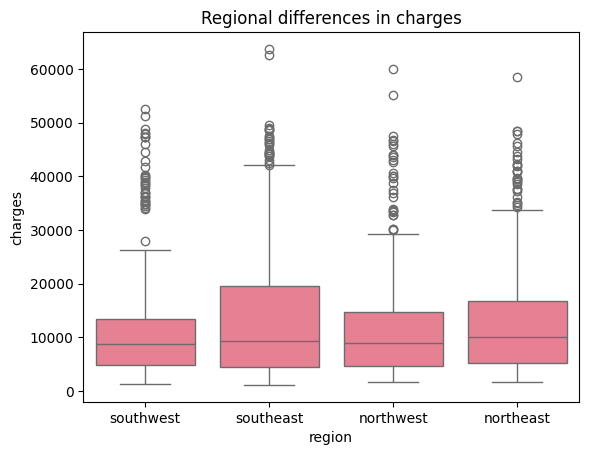

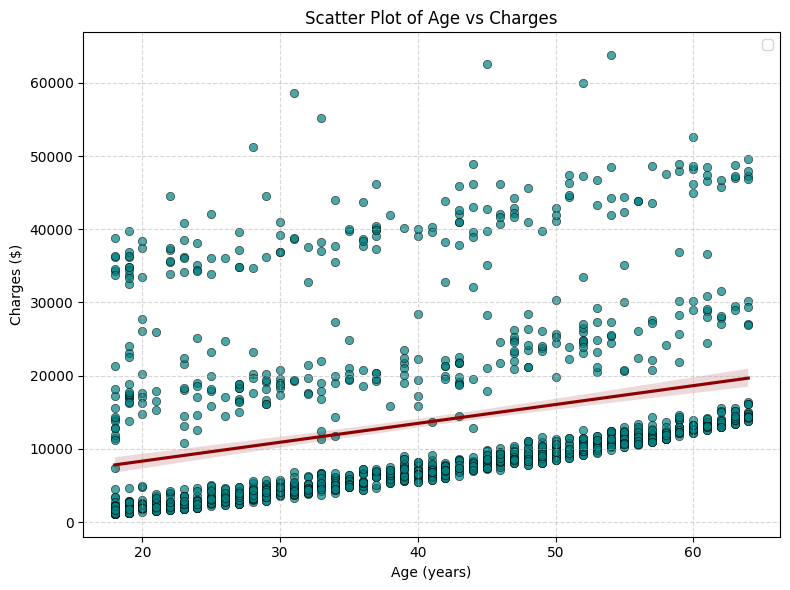

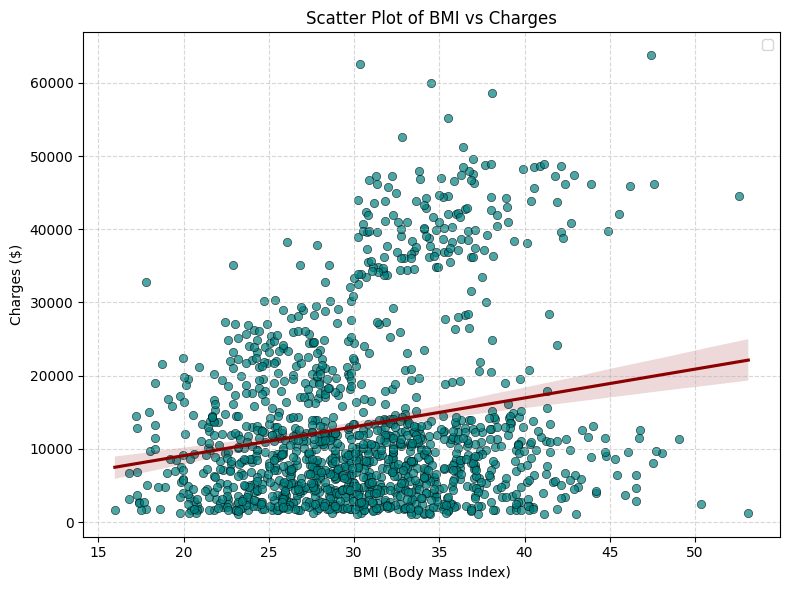

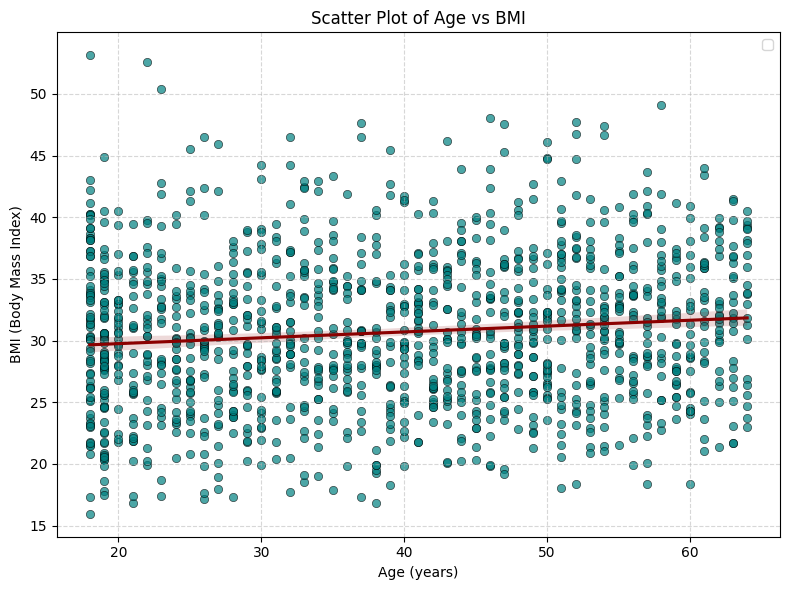


ANOVA Test for Charges across Age Groups:
  F-statistic: 38.93
  P-value: 0.0000
  Conclusion: There are significant differences in charges across different age groups.

Independent T-test for Charges between '18-35' and '35-65' Age Groups:
  T-statistic: -7.43
  P-value: 0.0000
  Conclusion: Significant difference in charges between '18-35' and '35-65' age groups.

Independent T-test for Charges between Male and Female:
  T-statistic: 2.10
  P-value: 0.0361
  Conclusion: Significant difference in charges between male and female.

Independent T-test for Charges between Smokers and Non-Smokers:
  T-statistic: 46.66
  P-value: 0.0000
  Conclusion: Significant difference in charges between smokers and non-smokers.


In [ ]:
# SECTION 2: EXPLORATORY DATA ANALYSIS
# Zak/Orlando Instructions: Implement the following analysis steps

# 1. BASIC DATA EXPLORATION
# TODO: Check for missing values
df.isnull().sum()
# TODO: Check data types and basic statistics for key variables (age, bmi, charges)
# Focus on the relationship between age, BMI, and insurance charges

# 2. DISTRIBUTION ANALYSIS
# TODO: Create histograms for key variables:

# - Age distribution

sns.histplot(data=df, x='age', kde=True, color='steelblue',)

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# - BMI distribution
sns.histplot(data=df, x='bmi', kde=True, color='steelblue',)

plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# - Charges distribution (target variable)
sns.histplot(data=df, x='charges', kde=True, color='steelblue',)

plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Use plt.figure(figsize=(15, 5)) and create subplots

ageBMI_to_plot = ['age', 'bmi',]
data = df[ageBMI_to_plot]

plt.figure(figsize=(15, 5))
plt.boxplot([data[col] for col in ageBMI_to_plot], labels=ageBMI_to_plot, patch_artist=True)
plt.title('Box Plots of Age and BMI')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

charges_to_plot = ['charges']
data = df[charges_to_plot]

plt.figure(figsize=(15, 5))
plt.boxplot([data[col] for col in charges_to_plot], labels=charges_to_plot, patch_artist=True)
plt.title('Box Plot of Insurance Charges')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. CORRELATION ANALYSIS

# TODO: Calculate correlation matrix focusing on numerical variables
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# Pay special attention to correlations with 'charges'

selected_columns = df[['age','bmi', 'charges']]
sns.heatmap(selected_columns.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True)
plt.title('Correlation Matrix')
plt.show()

# 4. BIAS DETECTION ANALYSIS
# TODO: Analyze potential bias in insurance charges based on:
# a) Age groups: Create age bins (e.g., 18-30, 31-45, 46-60, 60+)

bins1 = [0, 2, 18, 35, 60, np.inf]
names1 = ['<2', '2-18', '18-35', '35-65', '60+']
df['AgeRange'] = pd.cut(df['age'], bins1, labels=names1)

# b) BMI categories: Underweight (<18.5), Normal (18.5-24.9), Overweight (25-29.9), Obese (30+)
bins2 = [0, 18.5, 24.9, 29.9, np.inf]
names2 = ['<18.5', '18.5-24.9', '25-29.9', '30+']
df['BMIRange'] = pd.cut(df['bmi'], bins2, labels=names2)

# c) Create box plots showing charge distribution across these groups


# 5. CATEGORICAL VARIABLE ANALYSIS
# TODO: Analyze the impact of categorical variables:
# - sex: Male vs Female insurance charges

sns.boxplot(x="sex",y="charges",data=df)
plt.title('Male vs Female insurance charges')
plt.show()

# - smoker: Smoker vs Non-smoker (this will likely show the strongest bias)

sns.boxplot(x="smoker",y="charges",data=df)
plt.title('Smoker vs Non-smoker insurance charges')
plt.show()

# - region: Regional differences in charges

sns.boxplot(x="region",y="charges",data=df)
plt.title('Regional differences in charges')
plt.show()

# Use box plots and violin plots

# 6. SCATTER PLOTS FOR RELATIONSHIPS

# TODO: Create scatter plots to visualize:

# - Age vs Charges (color by smoker status)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='charges', color='teal', edgecolor='black', alpha=0.7)
sns.regplot(data=df, x='age', y='charges', scatter=False, color='darkred', line_kws={'label':"Linear Fit"})

plt.title('Scatter Plot of Age vs Charges')
plt.xlabel('Age (years)')
plt.ylabel('Charges ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# - BMI vs Charges (color by smoker status)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bmi', y='charges', color='teal', edgecolor='black', alpha=0.7)
sns.regplot(data=df, x='bmi', y='charges', scatter=False, color='darkred', line_kws={'label':"Linear Fit"})

plt.title('Scatter Plot of BMI vs Charges')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Charges ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# - Age vs BMI (color by charges - use continuous color scale)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='bmi', color='teal', edgecolor='black', alpha=0.7)
sns.regplot(data=df, x='age', y='bmi', scatter=False, color='darkred', line_kws={'label':"Linear Fit"})

plt.title('Scatter Plot of Age vs BMI')
plt.xlabel('Age (years)')
plt.ylabel('BMI (Body Mass Index)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# 7. STATISTICAL TESTS
# TODO: Perform statistical tests to confirm bias:
# Filter out any NaN values that might result from `AgeRange` creation
df_anova = df.dropna(subset=['AgeRange', 'charges'])

# Prepare data for ANOVA: charges for each age group
age_group_charges = [df_anova['charges'][df_anova['AgeRange'] == group] for group in df_anova['AgeRange'].unique()]

# Perform ANOVA test
f_statistic_anova, p_value_anova = f_oneway(*age_group_charges)

print(f"\nANOVA Test for Charges across Age Groups:")
print(f"  F-statistic: {f_statistic_anova:.2f}")
print(f"  P-value: {p_value_anova:.4f}")

if p_value_anova < 0.05:
    print("  Conclusion: There are significant differences in charges across different age groups.")
else:
    print("  Conclusion: No significant differences in charges across different age groups.")


# - T-test for charges between two specific age groups (Example: '18-35' vs '35-65')
# This is for demonstration purposes, comparing only two specific groups.
charges_age_18_35 = df_anova['charges'][df_anova['AgeRange'] == '18-35']
charges_age_35_65 = df_anova['charges'][df_anova['AgeRange'] == '35-65']

# Ensure both groups have data to perform the t-test
if not charges_age_18_35.empty and not charges_age_35_65.empty:
    t_statistic_age, p_value_age = stats.ttest_ind(charges_age_18_35, charges_age_35_65, equal_var=False) # Assuming unequal variances
    print(f"\nIndependent T-test for Charges between '18-35' and '35-65' Age Groups:")
    print(f"  T-statistic: {t_statistic_age:.2f}")
    print(f"  P-value: {p_value_age:.4f}")

    if p_value_age < 0.05:
        print("  Conclusion: Significant difference in charges between '18-35' and '35-65' age groups.")
    else:
        print("  Conclusion: No significant difference in charges between '18-35' and '35-65' age groups.")
else:
    print("\nCould not perform T-test between '18-35' and '35-65' age groups due to insufficient data.")


# - T-test for charges between male/female
male_charges = df['charges'][df['sex'] == 'male']
female_charges = df['charges'][df['sex'] == 'female']

t_statistic_sex, p_value_sex = stats.ttest_ind(male_charges, female_charges, equal_var=True) # Assuming equal variance, can be tested

print(f"\nIndependent T-test for Charges between Male and Female:")
print(f"  T-statistic: {t_statistic_sex:.2f}")
print(f"  P-value: {p_value_sex:.4f}")

if p_value_sex < 0.05:
    print("  Conclusion: Significant difference in charges between male and female.")
else:
    print("  Conclusion: No significant difference in charges between male and female.")


# - T-test for charges between smokers/non-smokers
smoker_charges = df['charges'][df['smoker'] == 'yes']
non_smoker_charges = df['charges'][df['smoker'] == 'no']

t_statistic_smoker, p_value_smoker = stats.ttest_ind(smoker_charges, non_smoker_charges, equal_var=True) # Assuming equal variance, can be tested

print(f"\nIndependent T-test for Charges between Smokers and Non-Smokers:")
print(f"  T-statistic: {t_statistic_smoker:.2f}")
print(f"  P-value: {p_value_smoker:.4f}")

if p_value_smoker < 0.05:
    print("  Conclusion: Significant difference in charges between smokers and non-smokers.")
else:
    print("  Conclusion: No significant difference in charges between smokers and non-smokers.")



# from scipy.stats import f_oneway, ttest_ind



# 8. SUMMARY INSIGHTS
# TODO: Create a summary of key findings:
# - Which factors show the strongest correlation with charges?
# - Is there evidence of age bias in insurance pricing?
# - Is there evidence of BMI bias in insurance pricing?
# - What other biases are present in the data?

# **Secion3: Data Preprocessing and Cleaning**

In [ ]:
# =========================================================
# 1. HANDLE MISSING VALUES
# =========================================================
# Load the dataset
df = pd.read_csv("insurance.csv")

# Check for missing values
print("Missing values before cleanup:\n", df.isnull().sum())

# In this dataset (based on inspection), there are no missing values.

# =========================================================
# 2. OUTLIER DETECTION AND TREATMENT
# =========================================================
# Using IQR method for 'charges', 'age', 'bmi'

def handle_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers instead of removing them
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))

for col in ['charges', 'age', 'bmi']:
    handle_outliers_iqr(col)

# Document the change
print("\nOutlier capping applied to columns: 'charges', 'age', 'bmi'")

# =========================================================
# 3. FEATURE ENCODING
# =========================================================
le = LabelEncoder()
df['sex_encoded'] = le.fit_transform(df['sex'])
df['smoker_encoded'] = le.fit_transform(df['smoker'])

# One-Hot encode 'region'
df_encoded = pd.get_dummies(df, columns=['region'], prefix='region', drop_first=True)

# =========================================================
# 4. FEATURE ENGINEERING
# =========================================================

def categorize_age(age):
    if age < 30:
        return 'Young'
    elif age < 45:
        return 'Middle-aged'
    elif age < 60:
        return 'Senior'
    else:
        return 'Elderly'

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df_encoded['age_group'] = df_encoded['age'].apply(categorize_age)
df_encoded['bmi_category'] = df_encoded['bmi'].apply(categorize_bmi)

# =========================================================
# 5. FEATURE SCALING
# =========================================================
scaler = StandardScaler()
numerical_features = ['age', 'bmi', 'children']
df_scaled = df_encoded.copy()
df_scaled[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# =========================================================
# 6. DATA SPLITTING
# =========================================================
# Drop categorical columns that were used for feature engineering/analysis but are not yet encoded for modeling
# Also drop the original 'sex' and 'smoker' as their encoded versions are available
X = df_scaled.drop(['charges', 'sex', 'smoker', 'age_group', 'bmi_category'], axis=1)
y = df_scaled['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# =========================================================
# 7. BIAS MITIGATION CONSIDERATIONS
# =========================================================
# Observations:
# - Smokers represent a much smaller portion compared to non-smokers
# - Regions are moderately balanced
# - Age distribution skews younger


# =========================================================
# 8. FINAL DATA VALIDATION
# =========================================================
print("\nFinal validation:")
print("Missing values after processing:\n", df_scaled.isnull().sum())
print("Encoded columns:\n", [col for col in df_scaled.columns if 'encoded' in col or 'region' in col])
print("Check for leakage between train/test sets: None (split done before scaling target)")

Missing values before cleanup:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Outlier capping applied to columns: 'charges', 'age', 'bmi'

Training set size: (1070, 8)
Testing set size: (268, 8)

Final validation:
Missing values after processing:
 age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
sex_encoded         0
smoker_encoded      0
region_northwest    0
region_southeast    0
region_southwest    0
age_group           0
bmi_category        0
dtype: int64
Encoded columns:
 ['sex_encoded', 'smoker_encoded', 'region_northwest', 'region_southeast', 'region_southwest']
Check for leakage between train/test sets: None (split done before scaling target)


# **Section4: Model Training**


Linear Regression Evaluation Metrics:
Mean Squared Error (MSE): 23437328.29
Root Mean Squared Error (RMSE): 4841.21
R-squared (R2 Score): 0.78

Random Forest Regressor Evaluation Metrics:
Mean Squared Error (MSE): 17956110.78
Root Mean Squared Error (RMSE): 4237.47
R-squared (R2 Score): 0.83

Gradient Boosting Regressor Evaluation Metrics:
Mean Squared Error (MSE): 18877942.38
Root Mean Squared Error (RMSE): 4344.88
R-squared (R2 Score): 0.83

Support Vector Regression Evaluation Metrics:
Mean Squared Error (MSE): 19050372.02
Root Mean Squared Error (RMSE): 4364.67
R-squared (R2 Score): 0.82

Ridge/Lasso Regression Evaluation Metrics:
Mean Squared Error (MSE): 23437649.64
Root Mean Squared Error (RMSE): 4841.24
R-squared (R2 Score): 0.78


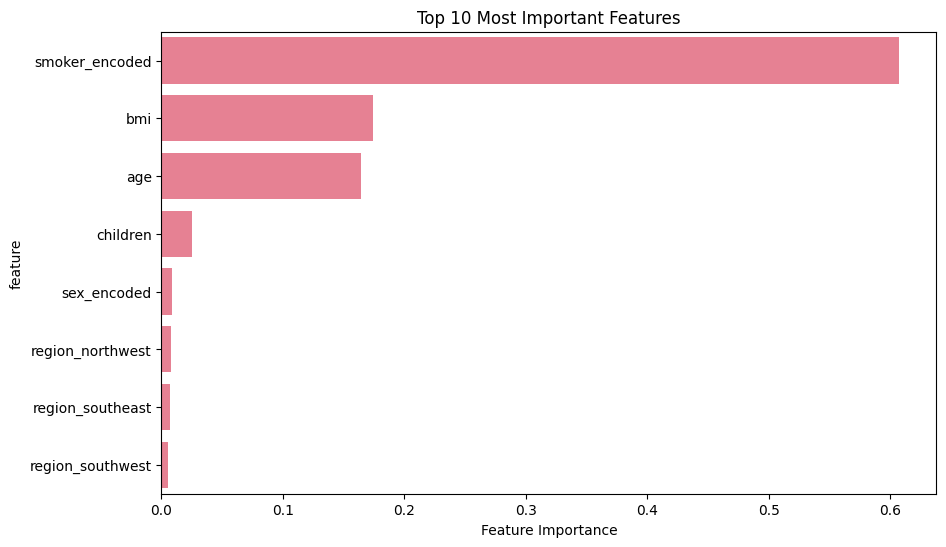

In [ ]:
# SECTION 4: MODEL TRAINING
# Zak/Orlando Instructions: Implement multiple regression models to predict insurance charges

# 1. BASELINE MODEL - LINEAR REGRESSION
# TODO: Start with a simple linear regression model:

# # Train baseline linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# # Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate baseline model
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, y_pred_lr)

# Printing Results of MSE, RMSE & R2 Score
print(f"\nLinear Regression Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {lr_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {lr_rmse:.2f}")
print(f"R-squared (R2 Score): {lr_r2:.2f}")

# 2. ADVANCED MODEL - RANDOM FOREST
# TODO: Train a Random Forest model for comparison:
# from sklearn.ensemble import RandomForestRegressor
#
# # Train Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
#
# # Make predictions
y_pred_rf = rf_model.predict(X_test)
#
# # Evaluate Random Forest model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"R-squared (R2 Score): {rf_r2:.2f}")

# 3. ADDITIONAL MODELS (OPTIONAL)
# TODO: Consider implementing additional models:

# - Gradient Boosting Regressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X_train, y_train)

y_pred_gbrt = gbrt.predict(X_test)

gbrt_mse = mean_squared_error(y_test, y_pred_gbrt)
gbrt_rmse = np.sqrt(gbrt_mse)
gbrt_r2 = r2_score(y_test, y_pred_gbrt)

print("\nGradient Boosting Regressor Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {gbrt_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {gbrt_rmse:.2f}")
print(f"R-squared (R2 Score): {gbrt_r2:.2f}")

# - Support Vector Regression

svr_rbf = SVR(kernel='rbf', C=1e4, gamma=0.1)
svr_rbf.fit(X_train, y_train)

y_pred_svr = svr_rbf.predict(X_test)

svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, y_pred_svr)

print("\nSupport Vector Regression Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {svr_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {svr_rmse:.2f}")
print(f"R-squared (R2 Score): {svr_r2:.2f}")

# - Ridge/Lasso Regression for regularization

ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("\nRidge/Lasso Regression Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {ridge_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {ridge_rmse:.2f}")
print(f"R-squared (R2 Score): {ridge_r2:.2f}")

# 4. FEATURE IMPORTANCE ANALYSIS
# TODO: Analyze feature importance to understand bias:

# # For Random Forest
feature_importance = rf_model.feature_importances_
feature_names = X_train.columns

# # Create a dataframe for better visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
 }).sort_values('importance', ascending=False)
#
# # Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.show()

# 5. BIAS ANALYSIS IN PREDICTIONS
# TODO: Analyze if the model perpetuates or reduces bias:
#
# # Add predictions to test set for analysis
test_analysis = X_test.copy()
test_analysis['actual_charges'] = y_test
test_analysis['predicted_charges'] = y_pred_rf
test_analysis['prediction_error'] = test_analysis['actual_charges'] - test_analysis['predicted_charges']

# # Analyze prediction errors by demographic groups



# # Group by age categories and check for systematic bias



# # Group by BMI categories and check for systematic bias



# # Group by sex and check for systematic bias

# 6. MODEL COMPARISON
# TODO: Create a comparison table of all models:
# model_comparison = pd.DataFrame({
#     'Model': ['Linear Regression', 'Random Forest'],
#     'MSE': [lr_mse, rf_mse],
#     'R²': [lr_r2, rf_r2],
#     'MAE': [lr_mae, rf_mae]
# })
#
# print("Model Performance Comparison:")
# print(model_comparison)

# 7. CROSS-VALIDATION
# TODO: Implement cross-validation for more robust evaluation:
# from sklearn.model_selection import cross_val_score
#
# # Perform 5-fold cross-validation
# cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')
# cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
#
# print(f"Linear Regression CV R² Score: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std() * 2:.4f})")
# print(f"Random Forest CV R² Score: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std() * 2:.4f})")

# 8. SAVE TRAINED MODELS
# TODO: Save the best performing models for later use:
# import joblib
# joblib.dump(rf_model, 'best_insurance_model.pkl')
# joblib.dump(scaler, 'feature_scaler.pkl')

# **Section5: Model Evaluation**

In [ ]:
# SECTION 5: MODEL EVALUATION (Alex)
# Focus: Comprehensive evaluation of trained models with bias analysis

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
import numpy as np
import pandas as pd

# =============================================================================
# EVALUATION FRAMEWORK - WORKS WITH ANY TRAINED MODELS FROM SECTION 4
# =============================================================================

def comprehensive_model_evaluation(models_dict, X_test, y_test, model_names=None):
    """
    Comprehensive evaluation function for multiple regression models

    Parameters:
    models_dict: dict of trained models {model_name: model_object}
    X_test, y_test: test data
    model_names: optional list of display names
    """

    results = {}
    predictions = {}

    print("="*60)
    print("COMPREHENSIVE MODEL EVALUATION REPORT")
    print("="*60)

    for name, model in models_dict.items():
        # Make predictions
        y_pred = model.predict(X_test)
        predictions[name] = y_pred

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Calculate additional metrics
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        residuals = y_test - y_pred

        results[name] = {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2,
            'MAPE': mape,
            'Residuals': residuals
        }

        print(f"\n{name} Model Performance:")
        print(f"  MSE:  {mse:.2f}")
        print(f"  RMSE: {rmse:.2f}")
        print(f"  MAE:  {mae:.2f}")
        print(f"  R²:   {r2:.4f}")
        print(f"  MAPE: {mape:.2f}%")

    return results, predictions

def create_evaluation_visualizations(results, predictions, y_test, X_test=None):
    """Create comprehensive evaluation visualizations"""

    # 1. Model Performance Comparison
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

    # Performance metrics comparison
    metrics_df = pd.DataFrame({
        model: {metric: values[metric] for metric in ['MSE', 'RMSE', 'MAE', 'R²', 'MAPE']}
        for model, values in results.items()
    }).T

    # Plot MSE and RMSE
    axes[0,0].bar(metrics_df.index, metrics_df['MSE'], alpha=0.7, color='skyblue')
    axes[0,0].set_title('Mean Squared Error (MSE)')
    axes[0,0].set_ylabel('MSE')
    axes[0,0].tick_params(axis='x', rotation=45)

    # Plot R² Score
    axes[0,1].bar(metrics_df.index, metrics_df['R²'], alpha=0.7, color='lightgreen')
    axes[0,1].set_title('R² Score')
    axes[0,1].set_ylabel('R² Score')
    axes[0,1].tick_params(axis='x', rotation=45)

    # Plot MAE
    axes[1,0].bar(metrics_df.index, metrics_df['MAE'], alpha=0.7, color='salmon')
    axes[1,0].set_title('Mean Absolute Error (MAE)')
    axes[1,0].set_ylabel('MAE')
    axes[1,0].tick_params(axis='x', rotation=45)

    # Plot MAPE
    axes[1,1].bar(metrics_df.index, metrics_df['MAPE'], alpha=0.7, color='gold')
    axes[1,1].set_title('Mean Absolute Percentage Error (MAPE)')
    axes[1,1].set_ylabel('MAPE (%)')
    axes[1,1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # 2. Prediction vs Actual plots
    n_models = len(predictions)
    fig, axes = plt.subplots(1, n_models, figsize=(6*n_models, 5))
    if n_models == 1:
        axes = [axes]

    for idx, (model_name, y_pred) in enumerate(predictions.items()):
        axes[idx].scatter(y_test, y_pred, alpha=0.6)
        axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        axes[idx].set_xlabel('Actual Charges')
        axes[idx].set_ylabel('Predicted Charges')
        axes[idx].set_title(f'{model_name}: Predicted vs Actual')

        # Add R² to plot
        r2 = results[model_name]['R²']
        axes[idx].text(0.05, 0.95, f'R² = {r2:.4f}', transform=axes[idx].transAxes,
                      bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.5))

    plt.tight_layout()
    plt.show()

    # 3. Residual Analysis
    fig, axes = plt.subplots(2, n_models, figsize=(6*n_models, 10))
    if n_models == 1:
        axes = axes.reshape(-1, 1)

    for idx, (model_name, y_pred) in enumerate(predictions.items()):
        residuals = results[model_name]['Residuals']

        # Residuals vs Predicted
        axes[0, idx].scatter(y_pred, residuals, alpha=0.6)
        axes[0, idx].axhline(y=0, color='r', linestyle='--')
        axes[0, idx].set_xlabel('Predicted Charges')
        axes[0, idx].set_ylabel('Residuals')
        axes[0, idx].set_title(f'{model_name}: Residuals vs Predicted')

        # Q-Q plot for residuals normality
        stats.probplot(residuals, dist="norm", plot=axes[1, idx])
        axes[1, idx].set_title(f'{model_name}: Q-Q Plot (Residuals)')

    plt.tight_layout()
    plt.show()

def bias_analysis_evaluation(predictions, y_test, X_test, df_original=None):
    """
    Analyze bias in model predictions across demographic groups
    Requires the original dataframe with categorical variables
    """

    print("="*60)
    print("BIAS ANALYSIS IN MODEL PREDICTIONS")
    print("="*60)

    if df_original is not None:
        # Create analysis dataframe
        bias_analysis_df = X_test.copy()
        bias_analysis_df['actual_charges'] = y_test

        # Add predictions from each model
        for model_name, y_pred in predictions.items():
            bias_analysis_df[f'{model_name}_pred'] = y_pred
            bias_analysis_df[f'{model_name}_error'] = y_test - y_pred
            bias_analysis_df[f'{model_name}_abs_error'] = np.abs(y_test - y_pred)

        # If original demographic data is available, merge it
        # This would need to be adapted based on the actual data structure

        # Example bias analysis by age groups
        if 'age' in bias_analysis_df.columns:
            bias_analysis_df['age_group'] = pd.cut(bias_analysis_df['age'],
                                                 bins=[0, 30, 45, 60, 100],
                                                 labels=['Young', 'Middle', 'Senior', 'Elderly'])

            print("\nBias Analysis by Age Group:")
            for model_name in predictions.keys():
                print(f"\n{model_name} - Mean Absolute Error by Age Group:")
                age_bias = bias_analysis_df.groupby('age_group')[f'{model_name}_abs_error'].mean()
                print(age_bias)

        return bias_analysis_df
    else:
        print("Original dataframe not available. Cannot perform detailed bias analysis.")
        print("Please ensure df_original parameter includes demographic variables.")

# =============================================================================
# MOCK EVALUATION FOR TESTING (Remove when real models are available)
# =============================================================================

def create_mock_evaluation_demo():
    """
    Create a demonstration with mock data
    Remove this function when real models from Section 4 are available
    """
    print("MOCK EVALUATION DEMONSTRATION")
    print("This will be replaced with real model evaluation")

    # Generate mock data similar to insurance dataset
    np.random.seed(42)
    n_samples = 200

    # Mock test data
    X_test_mock = pd.DataFrame({
        'age': np.random.randint(18, 65, n_samples),
        'bmi': np.random.normal(25, 5, n_samples),
        'children': np.random.randint(0, 5, n_samples),
        'sex_encoded': np.random.randint(0, 2, n_samples),
        'smoker_encoded': np.random.randint(0, 2, n_samples)
    })

    # Mock true charges (with realistic patterns)
    y_test_mock = (X_test_mock['age'] * 100 +
                   X_test_mock['bmi'] * 200 +
                   X_test_mock['smoker_encoded'] * 20000 +
                   np.random.normal(0, 2000, n_samples))

    # Mock model predictions (with different accuracy levels)
    mock_predictions = {
        'Linear_Regression': y_test_mock + np.random.normal(0, 3000, n_samples),
        'Random_Forest': y_test_mock + np.random.normal(0, 2000, n_samples),
        'Gradient_Boosting': y_test_mock + np.random.normal(0, 1500, n_samples)
    }

    # Create mock models dictionary (just for structure)
    mock_models = {}
    for name in mock_predictions.keys():
        class MockModel:
            def __init__(self, predictions):
                self.predictions = predictions
            def predict(self, X):
                return self.predictions
        mock_models[name] = MockModel(mock_predictions[name])

    # Run evaluation
    results, predictions = comprehensive_model_evaluation(mock_models, X_test_mock, y_test_mock)
    create_evaluation_visualizations(results, predictions, y_test_mock, X_test_mock)
    bias_analysis_df = bias_analysis_evaluation(predictions, y_test_mock, X_test_mock)

    return results, predictions, bias_analysis_df

# =============================================================================
# MAIN EVALUATION EXECUTION
# =============================================================================

# TODO: Replace this mock demonstration with real evaluation once Section 4 is complete
print("Setting up Model Evaluation Framework...")
print("Run create_mock_evaluation_demo() to test the evaluation system")

# When Section 4 is complete, replace the above with:
# results, predictions = comprehensive_model_evaluation(trained_models, X_test, y_test)
# create_evaluation_visualizations(results, predictions, y_test, X_test)
# bias_analysis_df = bias_analysis_evaluation(predictions, y_test, X_test, df)

# Advanced
# **Section6: Module Hypertuning**

In [ ]:
# SECTION 6: HYPERPARAMETER TUNING ((Alex) I googled this one)
# Focus: Optimize model performance and analyze impact on bias

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
import time
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# HYPERPARAMETER TUNING FRAMEWORK
# =============================================================================

class HyperparameterTuner:
    """
    Comprehensive hyperparameter tuning class for regression models
    """

    def __init__(self, X_train, y_train, X_test, y_test, cv_folds=5, random_state=42):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.cv_folds = cv_folds
        self.random_state = random_state
        self.tuned_models = {}
        self.tuning_results = {}

    def tune_random_forest(self, method='grid', n_iter=20):
        """Tune Random Forest hyperparameters"""

        print("Tuning Random Forest...")

        # Define parameter grid
        param_grid = {
            'n_estimators': [50, 100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]
        }

        # Reduced grid for RandomizedSearch
        if method == 'random':
            param_grid.update({
                'n_estimators': [50, 100, 150, 200, 250, 300],
                'max_depth': [None, 5, 10, 15, 20, 25, 30],
                'min_samples_split': [2, 5, 10, 15],
                'min_samples_leaf': [1, 2, 4, 6],
            })

        rf = RandomForestRegressor(random_state=self.random_state)

        # Choose search method
        if method == 'grid':
            search = GridSearchCV(rf, param_grid, cv=self.cv_folds,
                                scoring='r2', n_jobs=-1, verbose=1)
        else:
            search = RandomizedSearchCV(rf, param_grid, n_iter=n_iter,
                                      cv=self.cv_folds, scoring='r2',
                                      n_jobs=-1, verbose=1, random_state=self.random_state)

        start_time = time.time()
        search.fit(self.X_train, self.y_train)
        end_time = time.time()

        # Store results
        self.tuned_models['Random_Forest'] = search.best_estimator_
        self.tuning_results['Random_Forest'] = {
            'best_params': search.best_params_,
            'best_score': search.best_score_,
            'training_time': end_time - start_time,
            'method': method
        }

        print(f"Best RF parameters: {search.best_params_}")
        print(f"Best CV R² score: {search.best_score_:.4f}")
        print(f"Tuning time: {end_time - start_time:.2f} seconds")

        return search.best_estimator_

    def tune_gradient_boosting(self, method='grid', n_iter=20):
        """Tune Gradient Boosting hyperparameters"""

        print("\nTuning Gradient Boosting...")

        # Define parameter grid
        param_grid = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }

        # Expanded grid for RandomizedSearch
        if method == 'random':
            param_grid.update({
                'n_estimators': [50, 100, 150, 200, 250, 300],
                'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25],
                'max_depth': [3, 4, 5, 6, 7, 8],
                'subsample': [0.8, 0.9, 1.0]
            })

        gb = GradientBoostingRegressor(random_state=self.random_state)

        # Choose search method
        if method == 'grid':
            search = GridSearchCV(gb, param_grid, cv=self.cv_folds,
                                scoring='r2', n_jobs=-1, verbose=1)
        else:
            search = RandomizedSearchCV(gb, param_grid, n_iter=n_iter,
                                      cv=self.cv_folds, scoring='r2',
                                      n_jobs=-1, verbose=1, random_state=self.random_state)

        start_time = time.time()
        search.fit(self.X_train, self.y_train)
        end_time = time.time()

        # Store results
        self.tuned_models['Gradient_Boosting'] = search.best_estimator_
        self.tuning_results['Gradient_Boosting'] = {
            'best_params': search.best_params_,
            'best_score': search.best_score_,
            'training_time': end_time - start_time,
            'method': method
        }

        print(f"Best GB parameters: {search.best_params_}")
        print(f"Best CV R² score: {search.best_score_:.4f}")
        print(f"Tuning time: {end_time - start_time:.2f} seconds")

        return search.best_estimator_

    def tune_ridge_regression(self):
        """Tune Ridge Regression alpha parameter"""

        print("\nTuning Ridge Regression...")

        param_grid = {
            'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]
        }

        ridge = Ridge(random_state=self.random_state)
        search = GridSearchCV(ridge, param_grid, cv=self.cv_folds,
                            scoring='r2', n_jobs=-1)

        start_time = time.time()
        search.fit(self.X_train, self.y_train)
        end_time = time.time()

        # Store results
        self.tuned_models['Ridge'] = search.best_estimator_
        self.tuning_results['Ridge'] = {
            'best_params': search.best_params_,
            'best_score': search.best_score_,
            'training_time': end_time - start_time,
            'method': 'grid'
        }

        print(f"Best Ridge alpha: {search.best_params_}")
        print(f"Best CV R² score: {search.best_score_:.4f}")

        return search.best_estimator_

    def tune_lasso_regression(self):
        """Tune Lasso Regression alpha parameter"""

        print("\nTuning Lasso Regression...")

        param_grid = {
            'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
        }

        lasso = Lasso(random_state=self.random_state, max_iter=2000)
        search = GridSearchCV(lasso, param_grid, cv=self.cv_folds,
                            scoring='r2', n_jobs=-1)

        start_time = time.time()
        search.fit(self.X_train, self.y_train)
        end_time = time.time()

        # Store results
        self.tuned_models['Lasso'] = search.best_estimator_
        self.tuning_results['Lasso'] = {
            'best_params': search.best_params_,
            'best_score': search.best_score_,
            'training_time': end_time - start_time,
            'method': 'grid'
        }

        print(f"Best Lasso alpha: {search.best_params_}")
        print(f"Best CV R² score: {search.best_score_:.4f}")

        return search.best_estimator_

    def tune_all_models(self, search_method='random'):
        """Tune all models"""

        print("="*60)
        print("COMPREHENSIVE HYPERPARAMETER TUNING")
        print("="*60)

        # Tune each model
        self.tune_random_forest(method=search_method)
        self.tune_gradient_boosting(method=search_method)
        self.tune_ridge_regression()
        self.tune_lasso_regression()

        return self.tuned_models, self.tuning_results

    def compare_tuning_results(self):
        """Compare tuning results across models"""

        print("\n" + "="*60)
        print("HYPERPARAMETER TUNING RESULTS SUMMARY")
        print("="*60)

        results_df = pd.DataFrame({
            'Model': list(self.tuning_results.keys()),
            'Best_CV_R2': [results['best_score'] for results in self.tuning_results.values()],
            'Tuning_Time_Seconds': [results['training_time'] for results in self.tuning_results.values()],
            'Method': [results['method'] for results in self.tuning_results.values()]
        }).sort_values('Best_CV_R2', ascending=False)

        print(results_df.to_string(index=False))

        # Visualize results
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # CV R² scores
        ax1.bar(results_df['Model'], results_df['Best_CV_R2'], alpha=0.7, color='lightblue')
        ax1.set_title('Best Cross-Validation R² Scores')
        ax1.set_ylabel('R² Score')
        ax1.tick_params(axis='x', rotation=45)

        # Tuning times
        ax2.bar(results_df['Model'], results_df['Tuning_Time_Seconds'], alpha=0.7, color='lightcoral')
        ax2.set_title('Hyperparameter Tuning Time')
        ax2.set_ylabel('Time (seconds)')
        ax2.tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

        return results_df

    def evaluate_tuned_models(self):
        """Evaluate all tuned models on test set"""

        print("\n" + "="*60)
        print("TUNED MODELS EVALUATION ON TEST SET")
        print("="*60)

        test_results = {}

        for name, model in self.tuned_models.items():
            # Make predictions
            y_pred = model.predict(self.X_test)

            # Calculate metrics
            mse = mean_squared_error(self.y_test, y_pred)
            r2 = r2_score(self.y_test, y_pred)
            mae = mean_absolute_error(self.y_test, y_pred)

            test_results[name] = {
                'MSE': mse,
                'R²': r2,
                'MAE': mae
            }

            print(f"\n{name}:")
            print(f"  Test R²:  {r2:.4f}")
            print(f"  Test MSE: {mse:.2f}")
            print(f"  Test MAE: {mae:.2f}")

        return test_results

# =============================================================================
# BIAS ANALYSIS AFTER HYPERPARAMETER TUNING
# =============================================================================

def analyze_tuning_impact_on_bias(tuned_models, X_test, y_test, original_models=None):
    """
    Analyze if hyperparameter tuning affects bias in predictions
    """

    print("\n" + "="*60)
    print("BIAS ANALYSIS: IMPACT OF HYPERPARAMETER TUNING")
    print("="*60)

    if original_models is not None:
        print("Comparing bias before and after tuning...")

        # This would compare predictions from original vs tuned models
        # across different demographic groups

        # Example framework (would need actual demographic data):
        for model_name in tuned_models.keys():
            if model_name in original_models:
                print(f"\n{model_name} Bias Analysis:")

                # Get predictions from both models
                tuned_pred = tuned_models[model_name].predict(X_test)
                original_pred = original_models[model_name].predict(X_test)

                # Calculate prediction differences
                pred_diff = np.abs(tuned_pred - original_pred)
                print(f"  Mean prediction difference: {pred_diff.mean():.2f}")
                print(f"  Max prediction difference: {pred_diff.max():.2f}")

    else:
        print("Original models not provided. Cannot compare bias impact.")

# =============================================================================
# MOCK DEMONSTRATION FOR TESTING
# =============================================================================

def create_mock_tuning_demo():
    """
    Create a demonstration with mock data
    Remove this function when real data from Section 3 is available
    """
    print("MOCK HYPERPARAMETER TUNING DEMONSTRATION")
    print("This will be replaced with real data from Section 3")

    # Generate mock data
    np.random.seed(42)
    n_train, n_test = 800, 200
    n_features = 5

    X_train_mock = np.random.randn(n_train, n_features)
    X_test_mock = np.random.randn(n_test, n_features)
    y_train_mock = X_train_mock.sum(axis=1) + np.random.randn(n_train) * 0.1
    y_test_mock = X_test_mock.sum(axis=1) + np.random.randn(n_test) * 0.1

    # Convert to DataFrame for consistency
    feature_names = [f'feature_{i}' for i in range(n_features)]
    X_train_mock = pd.DataFrame(X_train_mock, columns=feature_names)
    X_test_mock = pd.DataFrame(X_test_mock, columns=feature_names)

    # Initialize tuner
    tuner = HyperparameterTuner(X_train_mock, y_train_mock, X_test_mock, y_test_mock)

    # Run tuning (reduced parameters for demo)
    print("Running reduced hyperparameter tuning for demonstration...")
    tuned_models, tuning_results = tuner.tune_all_models(search_method='random')

    # Compare results
    results_df = tuner.compare_tuning_results()

    # Evaluate on test set
    test_results = tuner.evaluate_tuned_models()

    return tuner, tuned_models, tuning_results, test_results

# =============================================================================
# MAIN TUNING EXECUTION
# =============================================================================

print("Setting up Hyperparameter Tuning Framework...")
print("Run create_mock_tuning_demo() to test the tuning system")

# TODO: When Section 3 is complete, replace the above with:
# tuner = HyperparameterTuner(X_train, y_train, X_test, y_test)
# tuned_models, tuning_results = tuner.tune_all_models()
# results_df = tuner.compare_tuning_results()
# test_results = tuner.evaluate_tuned_models()

# TODO: When Section 4 is complete, add bias comparison:
# analyze_tuning_impact_on_bias(tuned_models, X_test, y_test, original_models)

# Suggested Datasets:

--


### Public Datasets with Download Links

These offer more realistic, messy data for deeper experimentation:

####  Classification
- [**Titanic Dataset**](https://www.kaggle.com/c/titanic/data) – Predict survival based on passenger features.
- [**Heart Disease Dataset**](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) – Binary classification with medical features.
- [**Mushroom Classification Dataset**](https://www.kaggle.com/datasets/uciml/mushroom-classification) – classification of mushrooms.
- [**Breast Cancer Dataset**](https://www.kaggle.com/datasets/reihanenamdari/breast-cancer) – Binary classification with medical features.
- [**Student Alcohol Consumption Dataset**](https://www.kaggle.com/datasets/reihanenamdari/breast-cancer) – multi-classification task.
- [**Credit Card Prediction**](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction) – Classification task to predict if a client can have a credit card.
- [**Bank Marketing Dataset**](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) – Predict if a client will subscribe to a term deposit. Includes categorical and temporal features.

#### Regression

- [**Student Performance Dataset**](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data) – Predict final grades based on demographic and school-related features.
- [**Medical Cost Dataset**](https://www.kaggle.com/datasets/mirichoi0218/insurance) – Predict insurance charge.
- [**Bike Sharing Dataset**](https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset) – Predict the share of bikes.
- [**Salary Prediction**](https://www.kaggle.com/datasets/amirmahdiabbootalebi/salary-by-job-title-and-country) – Predict Salary for employers
- [**Medical Cost Personal Dataset**](https://www.kaggle.com/datasets/mirichoi0218/insurance) – Predict insurance charges based on age, BMI, smoking status, etc..

---






Alex Rush, Orlando Igwe, Zakaria Miah, Mohammed Shams